In [1]:
import eikon as eikon

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from matplotlib.ticker import FuncFormatter
import matplotlib.ticker as mticker
from functools import partial

In [3]:
 eikon.set_app_key('1153655a813e49b09943821a11d273d879402478')

In [4]:
rics = ['EDc1', 'EDc4', 'EDc7', 'EDc8', 'EDc9','EDc10','EDc11','EDc12','EDc13','EDc14', 'EDc15','EDc16']

In [5]:
#pulling all closing rates and putting into one table
table_2015_1 = eikon.get_timeseries (rics, fields ='CLOSE', start_date = '2015-01-01', end_date = '2015-01-07' , interval = 'daily', calendar='native')
table_2015 = eikon.get_timeseries (rics, fields ='CLOSE', start_date = '2015-01-08', end_date = '2015-12-31' , interval = 'daily', calendar='native')
table_2016_1 = eikon.get_timeseries (rics, fields ='CLOSE', start_date = '2016-01-01', end_date = '2016-01-05' , interval = 'daily', calendar='native')
table_2016 = eikon.get_timeseries (rics, fields ='CLOSE', start_date = '2016-01-01', end_date = '2016-12-31' , interval = 'daily', calendar='native')
table_2017_1 = eikon.get_timeseries (rics, fields ='CLOSE', start_date = '2017-01-01', end_date = '2017-01-03' , interval = 'daily', calendar='native')
table_2017 = eikon.get_timeseries (rics, fields ='CLOSE', start_date = '2017-01-01', end_date = '2017-12-31' , interval = 'daily', calendar='native')
table_2018_1 = eikon.get_timeseries (rics, fields ='CLOSE', start_date = '2018-01-01', end_date = '2018-01-02' , interval = 'daily', calendar='native')
table_2018 = eikon.get_timeseries (rics, fields ='CLOSE', start_date = '2018-01-01', end_date = '2018-12-31' , interval = 'daily', calendar='native')
table_2019 = eikon.get_timeseries (rics, fields ='CLOSE', start_date = '2019-01-01', end_date = '2019-12-31' , interval = 'daily', calendar='native')

In [6]:
table = pd.concat([table_2015_1, table_2015, table_2016_1, table_2016, table_2017_1, table_2017, table_2018_1, table_2018, table_2019,], ignore_index= False)

In [7]:
table1 = table
table1.fillna(method='bfill', inplace=True)

In [8]:
table1['EDc1_1D'] = (table1['EDc1'] - table1['EDc1'].shift(1))*100
table1['EDc4_1D'] = (table1['EDc4'] - table1['EDc4'].shift(1))*100
table1['EDc7_1D'] = (table1['EDc7'] - table1['EDc7'].shift(1))*100
table1['EDc8_1D'] = (table1['EDc8'] - table1['EDc8'].shift(1))*100
table1['EDc9_1D'] = (table1['EDc9'] - table1['EDc9'].shift(1))*100
table1['EDc10_1D'] = (table1['EDc10'] - table1['EDc10'].shift(1))*100
table1['EDc11_1D'] = (table1['EDc11'] - table1['EDc11'].shift(1))*100
table1['EDc12_1D'] = (table1['EDc12'] - table1['EDc12'].shift(1))*100
table1['EDc13_1D'] = (table1['EDc13'] - table1['EDc13'].shift(1))*100
table1['EDc14_1D'] = (table1['EDc14'] - table1['EDc14'].shift(1))*100
table1['EDc15_1D'] = (table1['EDc15'] - table1['EDc15'].shift(1))*100
table1['EDc16_1D'] = (table1['EDc16'] - table1['EDc16'].shift(1))*100

In [9]:
#creating table2: 1D change in rates
table2 = table1.loc[:,"EDc1_1D":"EDc16_1D"]
table2 = table2[7:]
table2

CLOSE,EDc1_1D,EDc4_1D,EDc7_1D,EDc8_1D,EDc9_1D,EDc10_1D,EDc11_1D,EDc12_1D,EDc13_1D,EDc14_1D,EDc15_1D,EDc16_1D
Date,,,,,,,,,,,,
2015-01-13,0.00,0.5,1.5,2.5,3.5,3.5,3.5,4.0,4.5,4.5,4.5,4.5
2015-01-14,0.00,1.0,3.5,4.5,5.5,7.0,7.5,8.0,8.5,8.5,8.0,7.5
2015-01-15,0.00,1.0,3.0,4.5,6.0,7.0,8.0,8.5,8.5,9.0,9.5,10.0
2015-01-16,-0.25,-0.5,-3.0,-4.0,-5.0,-6.0,-6.5,-7.0,-7.0,-7.5,-8.0,-8.0
2015-01-20,-0.50,-4.5,-0.5,-1.0,-1.5,-2.0,-2.5,-3.0,-3.0,-2.5,-2.0,-1.5
2015-01-21,0.00,0.5,-0.5,-1.0,-1.5,-2.0,-3.0,-3.5,-4.0,-5.0,-5.5,-6.0
2015-01-22,0.25,-0.5,-1.5,-2.0,-3.0,-3.5,-4.0,-4.5,-5.0,-5.0,-5.5,-6.0
2015-01-23,0.00,0.0,1.0,1.5,2.5,3.0,4.0,4.5,4.5,5.0,5.5,6.0
2015-01-26,0.00,0.0,-1.0,-1.5,-2.0,-2.5,-3.0,-3.0,-2.5,-2.5,-2.0,-2.0


In [10]:
#returning table1: raw data with filled in dates
table1 =table1.loc[:,"EDc1":"EDc16"]

In [11]:
white = ['EDc1_1D', 'EDc4_1D', 'EDc7_1D', 'EDc8_1D']

ED_white = []
for x in white:
    ED_white.extend(table2[x])
    
EDw = pd.DataFrame(ED_white)

In [12]:
red = ['EDc9_1D', 'EDc10_1D', 'EDc11_1D', 'EDc12_1D']

ED_red = []
for x in red:
    ED_red.extend(table2[x])
    
EDr = pd.DataFrame(ED_red)

In [13]:
green = ['EDc13_1D', 'EDc14_1D', 'EDc15_1D', 'EDc16_1D']

ED_green = []
for x in green:
    ED_green.extend(table2[x])

EDg = pd.DataFrame(ED_green)

In [14]:
#creating table3: change in rate from 1W ago 
table1['EDc1_7D'] = (table1['EDc1'] - table1['EDc1'].shift(7))*100
table1['EDc4_7D'] = (table1['EDc4'] - table1['EDc4'].shift(7))*100
table1['EDc7_7D'] = (table1['EDc7'] - table1['EDc7'].shift(7))*100
table1['EDc8_7D'] = (table1['EDc8'] - table1['EDc8'].shift(7))*100
table1['EDc9_7D'] = (table1['EDc9'] - table1['EDc9'].shift(7))*100
table1['EDc10_7D'] = (table1['EDc10'] - table1['EDc10'].shift(7))*100
table1['EDc11_7D'] = (table1['EDc11'] - table1['EDc11'].shift(7))*100
table1['EDc12_7D'] = (table1['EDc12'] - table1['EDc12'].shift(7))*100
table1['EDc13_7D'] = (table1['EDc13'] - table1['EDc13'].shift(7))*100
table1['EDc14_7D'] = (table1['EDc14'] - table1['EDc14'].shift(7))*100
table1['EDc15_7D'] = (table1['EDc15'] - table1['EDc15'].shift(7))*100
table1['EDc16_7D'] = (table1['EDc16'] - table1['EDc16'].shift(7))*100

table3 = table1.loc[:,"EDc1_7D":"EDc16_7D"]
table3 = table3[7:]
table3

CLOSE,EDc1_7D,EDc4_7D,EDc7_7D,EDc8_7D,EDc9_7D,EDc10_7D,EDc11_7D,EDc12_7D,EDc13_7D,EDc14_7D,EDc15_7D,EDc16_7D
Date,,,,,,,,,,,,
2015-01-13,0.00,2.5,13.0,17.5,21.5,25.0,28.5,31.5,33.5,35.0,36.0,36.0
2015-01-14,0.00,3.5,16.0,21.5,26.5,31.0,34.0,36.5,37.5,37.5,37.0,35.5
2015-01-15,-0.25,4.0,16.5,22.5,28.0,32.5,35.5,37.0,37.0,36.5,35.5,34.0
2015-01-16,-0.25,3.5,12.0,17.0,21.5,24.5,26.5,27.5,28.0,27.0,25.5,24.5
2015-01-20,-0.75,-1.0,10.5,15.0,19.0,21.5,23.5,24.5,26.0,27.0,27.0,27.0
2015-01-21,-0.75,-2.5,6.0,8.5,11.0,13.0,13.5,14.0,15.0,15.0,14.5,14.5
2015-01-22,-0.50,-2.5,2.5,3.5,4.0,4.0,3.0,2.5,2.5,2.0,1.0,0.5
2015-01-23,-0.50,-3.0,2.0,2.5,3.0,3.5,3.5,3.0,2.5,2.5,2.0,2.0
2015-01-26,-0.50,-4.0,-2.5,-3.5,-4.5,-6.0,-7.0,-8.0,-8.5,-8.5,-8.0,-7.5


In [20]:
#returning table1: raw data with filled in dates
table1 =table1.loc[:,"EDc1":"EDc16"]

In [15]:
white = ['EDc1_7D', 'EDc4_7D', 'EDc7_7D', 'EDc8_7D']

ED_white1 = []
for x in white:
    ED_white1.extend(table3[x])
    
EDwhite = pd.DataFrame(ED_white1)

In [16]:
red = ['EDc9_7D', 'EDc10_7D', 'EDc11_7D', 'EDc12_7D']

ED_red1 = []
for x in red:
    ED_red1.extend(table3[x])
    
EDred = pd.DataFrame(ED_red1)

In [17]:
green = ['EDc13_7D', 'EDc14_7D', 'EDc15_7D', 'EDc16_7D']

ED_green1 = []
for x in green:
    ED_green1.extend(table3[x])
    
EDgreen = pd.DataFrame(ED_green1)

In [18]:
EDw_filtered1 = EDw[0] >= 10 
EDw_filtered1 = np.where(EDw_filtered1)[0] + 7
EDw_nextday1 = EDwhite.loc[EDw_filtered1]

In [19]:
EDw_filtered2 = EDw[0] < -10 
EDw_filtered2 = np.where(EDw_filtered2)[0] + 7
EDw_nextday2 = EDwhite.loc[EDw_filtered2]

In [20]:
%matplotlib notebook

<IPython.core.display.Javascript object>


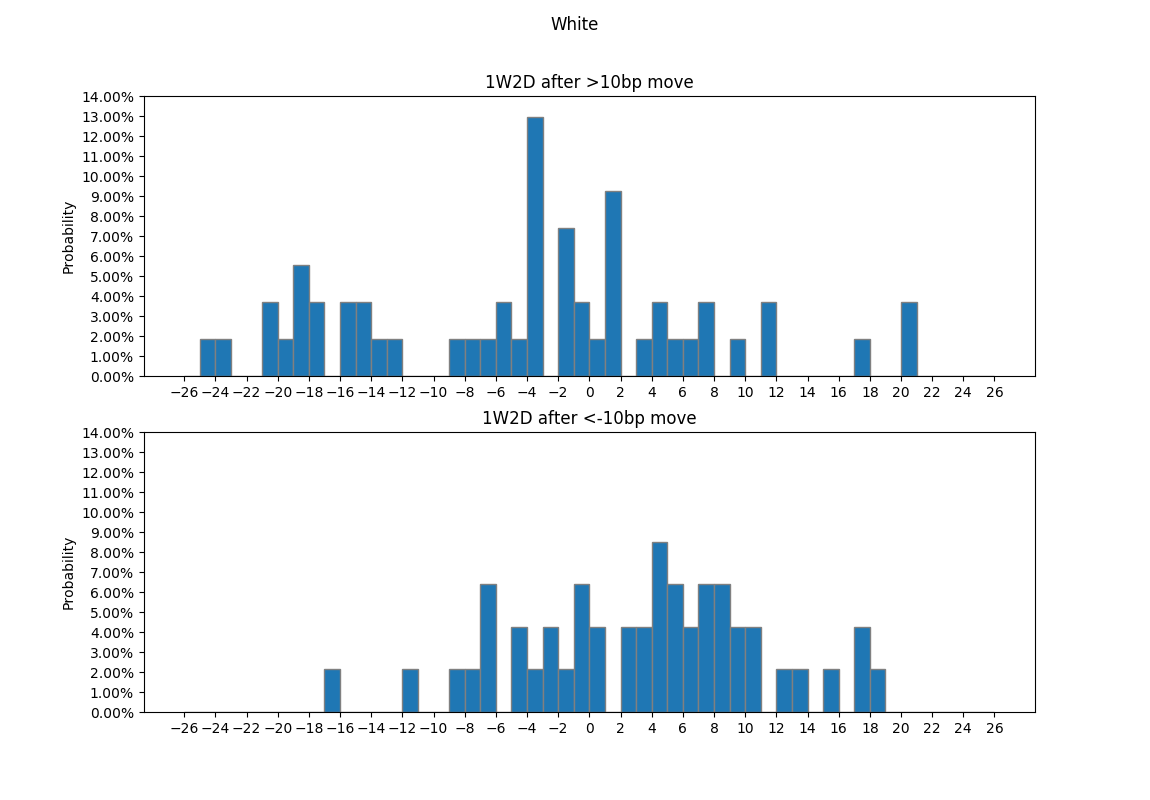

In [21]:
fig2, (ax4,ax5) = plt.subplots(2,1, figsize=(11.5,8))

ax4.hist(EDw_nextday1, bins = 52, range=[-26,26], normed = True, edgecolor='grey')
ax5.hist(EDw_nextday2, bins = 52, range=[-26,26], normed = True, edgecolor='grey')

ax4.title.set_text('1W2D after >10bp move')
ax5.title.set_text('1W2D after <-10bp move')

ax4.set_xticks(np.arange(-26,27,2))
ax5.set_xticks(np.arange(-26,27,2))

ax4.set_ylabel('Probability')
ax5.set_ylabel('Probability')

ax4.set_yticks(np.arange(0,0.15,0.01))
ax5.set_yticks(np.arange(0,0.15,0.01))

y_vals4 = ax4.get_yticks()
ax4.set_yticklabels(['{:3.2f}%'.format(x*100) for x in y_vals4])
y_vals5 = ax5.get_yticks()
ax5.set_yticklabels(['{:3.2f}%'.format(x*100) for x in y_vals5])

fig2.suptitle('White')

In [37]:
EDr_filtered1 = EDr[0] >= 10 
EDr_filtered1 = np.where(EDr_filtered1)[0] + 7
EDr_nextday1 = EDred.loc[EDr_filtered1]

In [38]:
EDr_filtered2 = EDr[0] < -10 
EDr_filtered2 = np.where(EDr_filtered2)[0] + 7
EDr_nextday2 = EDred.loc[EDr_filtered2]

<IPython.core.display.Javascript object>


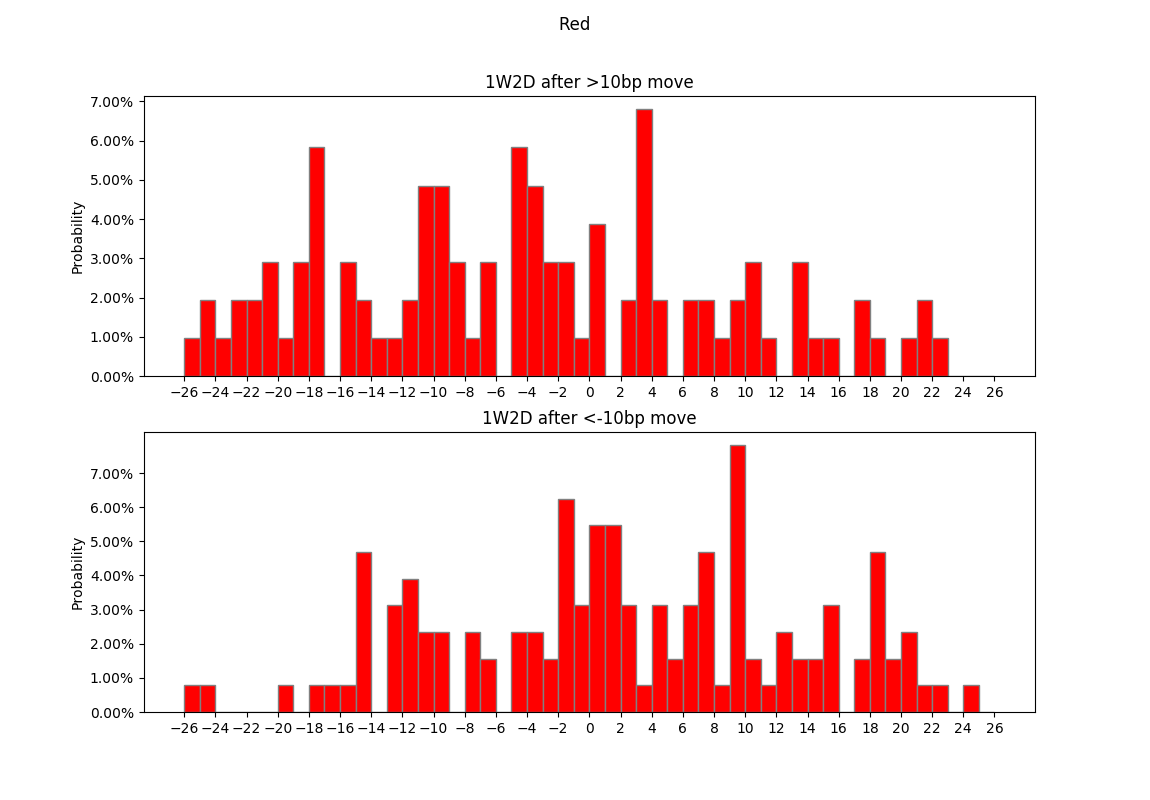

In [39]:
fig3, (ax6,ax7) = plt.subplots(2,1, figsize=(11.5,8))

ax6.hist(EDr_nextday1, bins = 52, range=[-26,26], normed = True, edgecolor='grey', color = 'red')
ax7.hist(EDr_nextday2, bins = 52, range=[-26,26], normed = True, edgecolor='grey', color = 'red')

ax6.title.set_text('1W2D after >10bp move')
ax7.title.set_text('1W2D after <-10bp move')

ax6.set_xticks(np.arange(-26,27,2))
ax7.set_xticks(np.arange(-26,27,2))

ax6.set_ylabel('Probability')
ax7.set_ylabel('Probability')

ax6.set_yticks(np.arange(0,0.08,0.01))
ax7.set_yticks(np.arange(0,0.08,0.01))

y_vals6 = ax6.get_yticks()
ax6.set_yticklabels(['{:3.2f}%'.format(x*100) for x in y_vals6])
y_vals7 = ax7.get_yticks()
ax7.set_yticklabels(['{:3.2f}%'.format(x*100) for x in y_vals7])

fig3.suptitle('Red')

In [40]:
EDg_filtered1 = EDg[0] >= 10 
EDg_filtered1 = np.where(EDg_filtered1)[0] + 7
EDg_nextday1 = EDgreen.loc[EDg_filtered1]

In [41]:
EDg_filtered2 = EDg[0] < -10 
EDg_filtered2 = np.where(EDg_filtered2)[0] + 7
EDg_nextday2 = EDgreen.loc[EDg_filtered2]

<IPython.core.display.Javascript object>


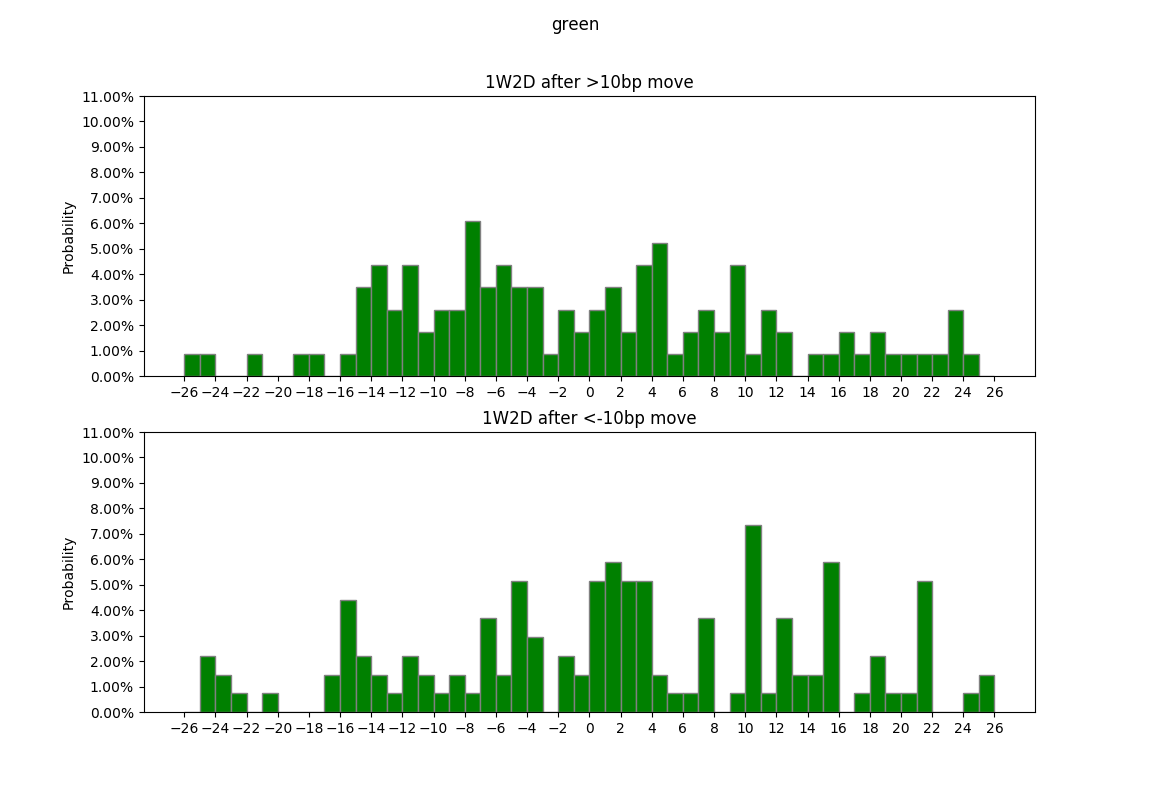

In [42]:
fig4, (ax8,ax9) = plt.subplots(2,1, figsize=(11.5,8))

ax8.hist(EDg_nextday1, bins = 52, range=[-26,26], normed = True, edgecolor='grey', color = 'green')
ax9.hist(EDg_nextday2, bins = 52, range=[-26,26], normed = True, edgecolor='grey', color = 'green')

ax8.title.set_text('1W2D after >10bp move')
ax9.title.set_text('1W2D after <-10bp move')

ax8.set_xticks(np.arange(-26,27,2))
ax9.set_xticks(np.arange(-26,27,2))

ax8.set_ylabel('Probability')
ax9.set_ylabel('Probability')

ax8.set_yticks(np.arange(0,0.12,0.01))
ax9.set_yticks(np.arange(0,0.12,0.01))

y_vals8 = ax8.get_yticks()
ax8.set_yticklabels(['{:3.2f}%'.format(x*100) for x in y_vals8])
y_vals9 = ax9.get_yticks()
ax9.set_yticklabels(['{:3.2f}%'.format(x*100) for x in y_vals9])

fig4.suptitle('green')

In [43]:
def count(list1,l,r):
    return len(list(x for x in list1 if l < x <= r))

In [45]:
count(EDg_nextday1[0], -10000,-10 )/len(EDg_nextday1)

0.2803030303030303

In [87]:
sum(EDw_nextday1[0])/len(EDw_nextday1)

-2.3245614035087767